In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv('../data/crude_bike_buyers.csv')

In [45]:
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


In [46]:
df.describe()

,ID,Income,Children,Cars,Age
count,1000.000000,994.000000,992.000000,991.000000,992.000000
mean,19965.992000,56267.605634,1.910282,1.455096,44.181452
std,5347.333948,31067.817462,1.626910,1.121755,11.362007
min,11000.000000,10000.000000,0.000000,0.000000,25.000000
25%,15290.750000,30000.000000,0.000000,1.000000,35.000000
50%,19744.000000,60000.000000,2.000000,1.000000,43.000000
75%,24470.750000,70000.000000,3.000000,2.000000,52.000000
max,29447.000000,170000.000000,5.000000,4.000000,89.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [48]:
df['Marital Status'] = df['Marital Status'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education'] = df['Education'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Home Owner'] = df['Home Owner'].astype('category')
df['Commute Distance'] = df['Commute Distance'].astype('category')
df['Region'] = df['Region'].astype('category')
df['Purchased Bike'] = df['Purchased Bike'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                1000 non-null   int64   
 1   Marital Status    993 non-null    category
 2   Gender            989 non-null    category
 3   Income            994 non-null    float64 
 4   Children          992 non-null    float64 
 5   Education         1000 non-null   category
 6   Occupation        1000 non-null   category
 7   Home Owner        996 non-null    category
 8   Cars              991 non-null    float64 
 9   Commute Distance  1000 non-null   category
 10  Region            1000 non-null   category
 11  Age               992 non-null    float64 
 12  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4), int64(1)
memory usage: 48.2 KB


In [49]:
for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print(type(Q1), type(Q3), sep=" ", end="\n")
    IQR = Q3 - Q1
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR
    outliers = df[(df[col] < min) | (df[col] > max)][col]
    print(outliers)

# Definir umbrales para identificar valores atípicos en 'col1'

# Filtrar las filas que contienen valores atípicos en 'col1'


<class 'numpy.float64'> <class 'numpy.float64'>
Series([], Name: ID, dtype: int64)
<class 'numpy.float64'> <class 'numpy.float64'>
6      160000.0
12     170000.0
43     170000.0
121    150000.0
178    160000.0
259    150000.0
321    160000.0
356    150000.0
829    170000.0
993    150000.0
Name: Income, dtype: float64
<class 'numpy.float64'> <class 'numpy.float64'>
Series([], Name: Children, dtype: float64)
<class 'numpy.float64'> <class 'numpy.float64'>
6      4.0
11     4.0
21     4.0
51     4.0
57     4.0
70     4.0
72     4.0
75     4.0
87     4.0
121    4.0
123    4.0
125    4.0
156    4.0
170    4.0
184    4.0
188    4.0
193    4.0
213    4.0
223    4.0
234    4.0
245    4.0
247    4.0
252    4.0
258    4.0
259    4.0
286    4.0
333    4.0
338    4.0
374    4.0
386    4.0
400    4.0
409    4.0
420    4.0
456    4.0
458    4.0
486    4.0
503    4.0
505    4.0
544    4.0
577    4.0
598    4.0
613    4.0
614    4.0
620    4.0
665    4.0
675    4.0
702    4.0
708    4.0
721    4.0
73

In [50]:
for col in df.columns:
    if pd.api.types.is_categorical_dtype(df[col]):
        categorias = df[col].cat.categories
        print(f"{col}:\n\t {[c for c in categorias]}\n")

Marital Status:
	 ['Married', 'Single']

Gender:
	 ['Female', 'Male']

Education:
	 ['Bachelors', 'Graduate Degree', 'High School', 'Partial College', 'Partial High School']

Occupation:
	 ['Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual']

Home Owner:
	 ['No', 'Yes']

Commute Distance:
	 ['0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles']

Region:
	 ['Europe', 'North America', 'Pacific']

Purchased Bike:
	 ['No', 'Yes']



In [51]:
#elimina columnas con un porcentaje de na mayor percent
del df['ID']
percent = 0.01 #0.05%
df.dropna(thresh = df.shape[0] - np.ceil(df.shape[0] * percent), axis=1)

,Marital Status,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,Married,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,Married,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,Married,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,Single,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,Single,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
995,Married,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,Single,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,Married,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,Single,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [52]:
df_numeric = df.select_dtypes(include='number')
for col in df_numeric.columns:
    df[col] = df[col].fillna(value=df[col].mean())

In [53]:
df_categoric = df.select_dtypes(include='category')
for col in df_categoric.columns:
    df[col] = df[col].fillna(value=df[col].mode()[0])

In [54]:
#q1 = summary.loc['25%','A']
#q3 = summary.loc['75%','A']
#iqr = q3 - q1
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Marital Status    1000 non-null   category
 1   Gender            1000 non-null   category
 2   Income            1000 non-null   float64 
 3   Children          1000 non-null   float64 
 4   Education         1000 non-null   category
 5   Occupation        1000 non-null   category
 6   Home Owner        1000 non-null   category
 7   Cars              1000 non-null   float64 
 8   Commute Distance  1000 non-null   category
 9   Region            1000 non-null   category
 10  Age               1000 non-null   float64 
 11  Purchased Bike    1000 non-null   category
dtypes: category(8), float64(4)
memory usage: 40.4 KB


<Axes: >

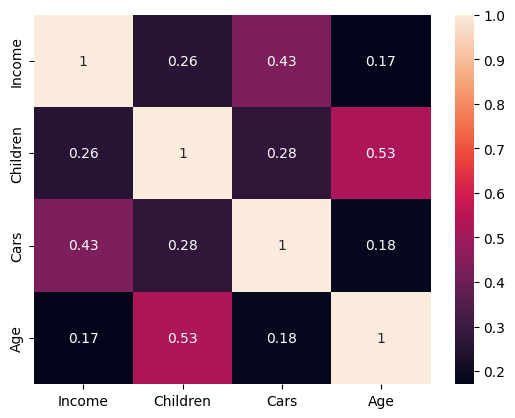

In [56]:
numeric_columns = df.select_dtypes(include='number')
sns.heatmap(numeric_columns.corr(), annot=True)

In [57]:
from scipy import stats


In [58]:
def get_anova(col_cat, col_num):
    resultado_anova = stats.f_oneway(*[df[col_num][df[col_cat] == categoria] for categoria in df[col_cat].unique()])
    return resultado_anova

In [59]:
f_punt = [[get_anova(col_cat, col_num)[1] for col_num in df_numeric] for col_cat in df_categoric]
p_value = [[get_anova(col_cat, col_num)[0] for col_num in df_numeric] for col_cat in df_categoric]

p_value_table = pd.DataFrame(p_value, columns=[name for name in df_numeric.columns])
p_value_table.index = [name for name in df_categoric.columns]

f_punt_table = pd.DataFrame(f_punt, columns=[name for name in df_numeric.columns])
f_punt_table.index = [name for name in df_categoric.columns]

<Axes: >

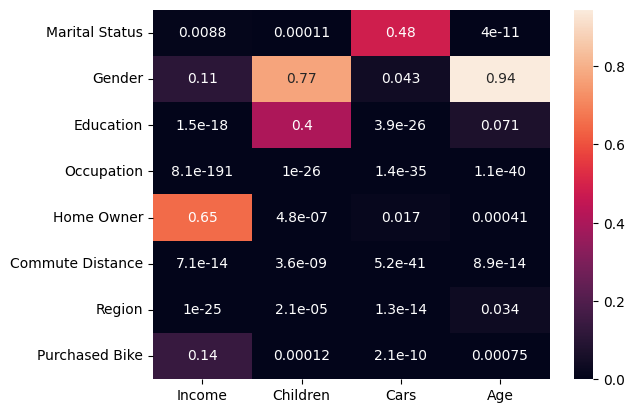

In [60]:
sns.heatmap(f_punt_table, annot=True)

<Axes: >

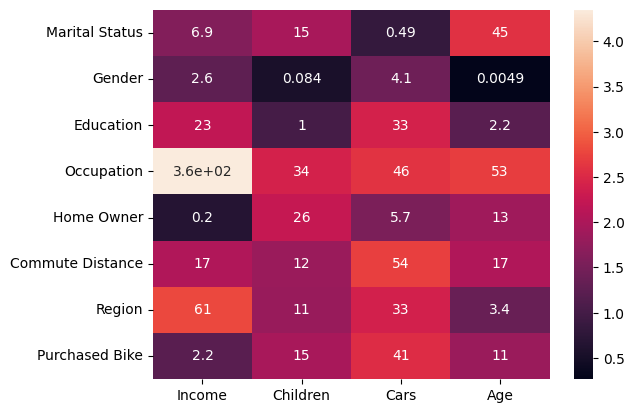

In [61]:
sns.heatmap(np.power(p_value_table, 1/4), annot=p_value_table.values)

In [62]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

<Axes: xlabel='Region', ylabel='Income'>

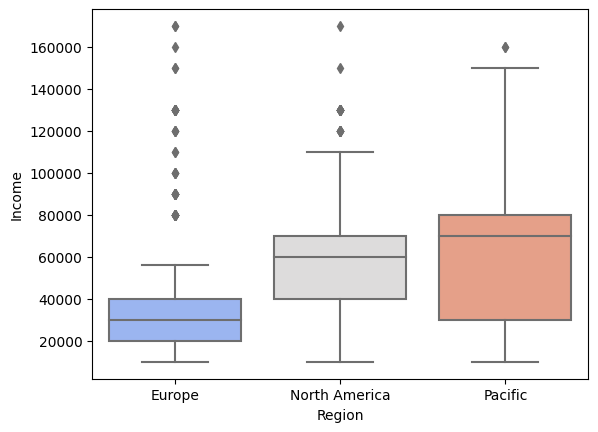

In [63]:
sns.boxplot(x="Region", y="Income",data=df, palette="coolwarm")

<Axes: xlabel='Home Owner', ylabel='Income'>

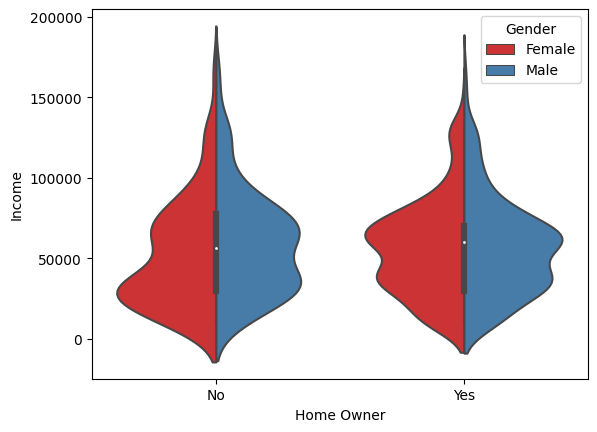

In [64]:
sns.violinplot(x="Home Owner", y="Income", data=df, hue='Gender',split=True,palette='Set1')

### **Pregunta 4**
Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, **para los clientes que si tienen hijos** ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

In [65]:
def Has_children(children):
    if children > 0:
        return True
    else:
        return False

In [66]:
df['Con_Hijos'] = df['Children'].apply(Has_children)

<Axes: xlabel='Con_Hijos', ylabel='count'>

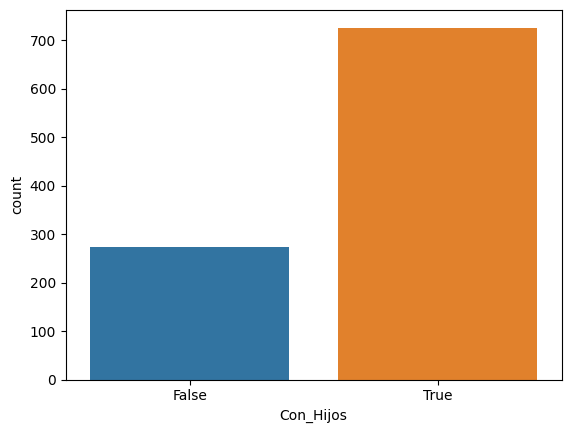

In [67]:
sns.countplot(x='Con_Hijos',data=df)

In [117]:
print("PROMEDIO DE HIJOS POR NIVEL EDUCATIVO DEL CLIENTE:")
[[Education,round(df[(df['Education']==Education) & (df['Children'] > 0) ]['Children'].mean(),2)] for Education in list(df['Education'].unique())]

PROMEDIO DE HIJOS POR NIVEL EDUCATIVO DEL CLIENTE:


[['Bachelors', 2.54],
 ['Partial College', 2.57],
 ['High School', 2.76],
 ['Partial High School', 2.71],
 ['Graduate Degree', 2.74]]

### **Pregunta 5**
Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, **para los clientes que si tienen vehículo** ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

In [70]:
def Has_car(car):
    if car > 0:
        return True
    else:
        return False

In [71]:
df['Con_vehiculo'] = df['Cars'].apply(Has_car)

<Axes: xlabel='Con_vehiculo', ylabel='count'>

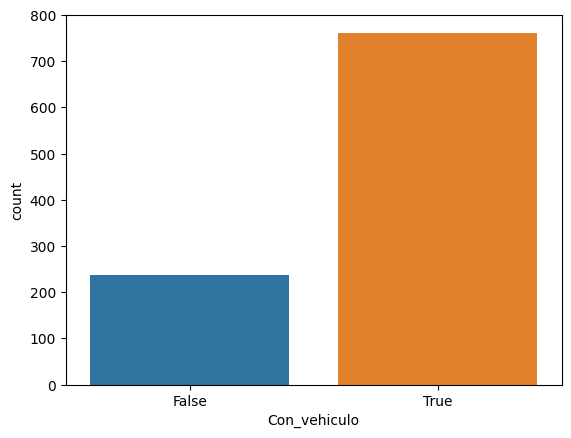

In [72]:
sns.countplot(x='Con_vehiculo',data=df)

In [113]:
[[occupation,round(df[(df['Occupation']==occupation) & (df['Cars'] > 0) ]['Cars'].mean(),2)] for occupation in list(df['Occupation'].unique())]

[['Skilled Manual', 1.72],
 ['Clerical', 1.49],
 ['Professional', 2.13],
 ['Manual', 1.45],
 ['Management', 2.35]]

> 1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?

In [81]:
df_mean_Income_per_buy_bike=pd.pivot_table(df, values='Income', index='Purchased Bike', aggfunc='mean')
df_mean_Income_per_buy_bike

,Income
Purchased Bike,
No,54874.759152
Yes,57770.489883


<Axes: xlabel='Purchased Bike', ylabel='Income'>

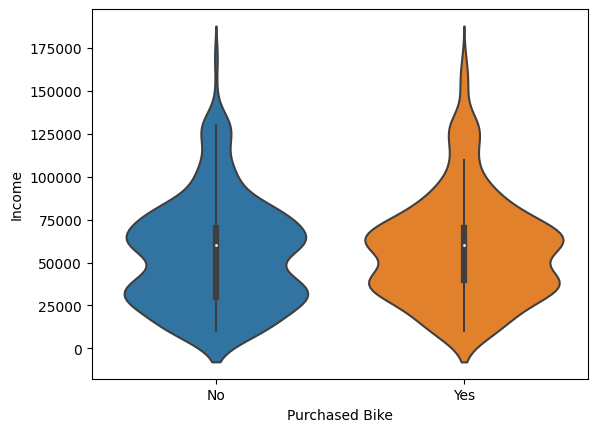

In [92]:
sns.violinplot(data=df, x='Purchased Bike', y='Income')

In [86]:
df_mean_Income_per_Marital_Status=pd.pivot_table(df, values='Income', index='Marital Status', aggfunc='mean')
df_mean_Income_per_Marital_Status

,Income
Marital Status,
Married,58625.591185
Single,53477.151116


<Axes: xlabel='Marital Status', ylabel='Income'>

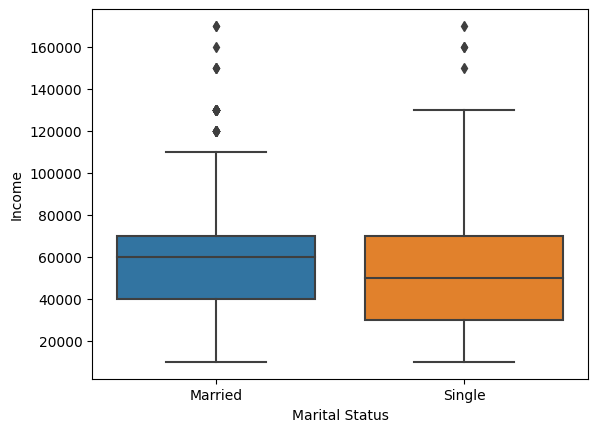

In [93]:
sns.boxplot(data=df, x='Marital Status', y='Income')

> 5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?

In [89]:
df_mean_Income_per_Home_Owner=pd.pivot_table(df, values='Age', index='Home Owner', aggfunc='mean')
df_mean_Income_per_Home_Owner

,Age
Home Owner,
No,42.316442
Yes,45.035115


<Axes: xlabel='Home Owner', ylabel='Age'>

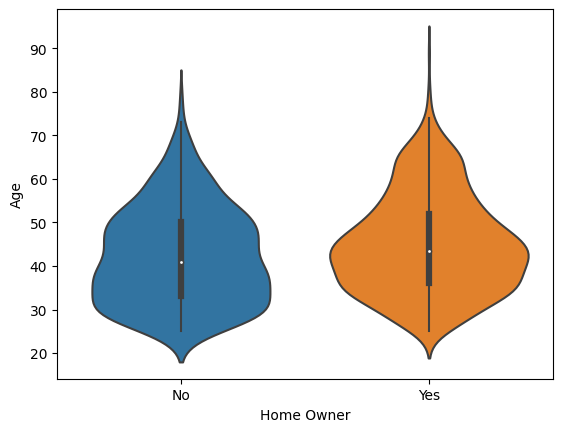

In [98]:
sns.violinplot(data=df, x='Home Owner', y='Age')